# 股票K线图绘制

## K线图

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from mplfinance.original_flavor import candlestick_ochl
import seaborn as sns
from matplotlib.pylab import date2num
from datetime import datetime
import numpy as np

sns.set()

In [31]:
# 获取数据
read_data = pd.read_csv('./股票数据.csv')

read_data.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20221230,13.04,13.28,12.96,13.16,13.03,0.13,0.9977,818035.98,1074756.754
1,000001.SZ,20221229,13.07,13.13,12.85,13.03,13.14,-0.11,-0.8371,666890.09,865144.967
2,000001.SZ,20221228,13.16,13.38,13.00,13.14,13.11,0.03,0.2288,791191.98,1042402.080
3,000001.SZ,20221227,12.87,13.22,12.87,13.11,12.77,0.34,2.6625,886004.12,1160090.119
4,000001.SZ,20221226,12.99,13.04,12.71,12.77,12.98,-0.21,-1.6179,797119.87,1021903.963


In [32]:
read_data['trade_date'] = read_data['trade_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))

read_data.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,2022-12-30,13.04,13.28,12.96,13.16,13.03,0.13,0.9977,818035.98,1074756.754
1,000001.SZ,2022-12-29,13.07,13.13,12.85,13.03,13.14,-0.11,-0.8371,666890.09,865144.967
2,000001.SZ,2022-12-28,13.16,13.38,13.00,13.14,13.11,0.03,0.2288,791191.98,1042402.080
3,000001.SZ,2022-12-27,12.87,13.22,12.87,13.11,12.77,0.34,2.6625,886004.12,1160090.119
4,000001.SZ,2022-12-26,12.99,13.04,12.71,12.77,12.98,-0.21,-1.6179,797119.87,1021903.963


In [33]:
read_data.to_csv('./股票数据_修改日期.csv', index=False)

In [34]:
read_data = pd.read_csv('./股票数据_修改日期.csv')

read_data.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,2022-12-30,13.04,13.28,12.96,13.16,13.03,0.13,0.9977,818035.98,1074756.754
1,000001.SZ,2022-12-29,13.07,13.13,12.85,13.03,13.14,-0.11,-0.8371,666890.09,865144.967
2,000001.SZ,2022-12-28,13.16,13.38,13.00,13.14,13.11,0.03,0.2288,791191.98,1042402.080
3,000001.SZ,2022-12-27,12.87,13.22,12.87,13.11,12.77,0.34,2.6625,886004.12,1160090.119
4,000001.SZ,2022-12-26,12.99,13.04,12.71,12.77,12.98,-0.21,-1.6179,797119.87,1021903.963


In [35]:
def date_to_num(dates):
    datetime_list = []
    for date in dates:
        date_time = datetime.strptime(date, '%Y-%m-%d')
        num_date = date2num(date_time)
        datetime_list.append(num_date)

    return datetime_list

In [36]:
data_array = read_data.values
data_array[:, 1] = date_to_num(data_array[:, 1])

In [37]:
quote = np.column_stack((data_array[:, 1:6][:, :2], data_array[:, 1:6][:, 4:], data_array[:, 1:6][:, 2:4]))

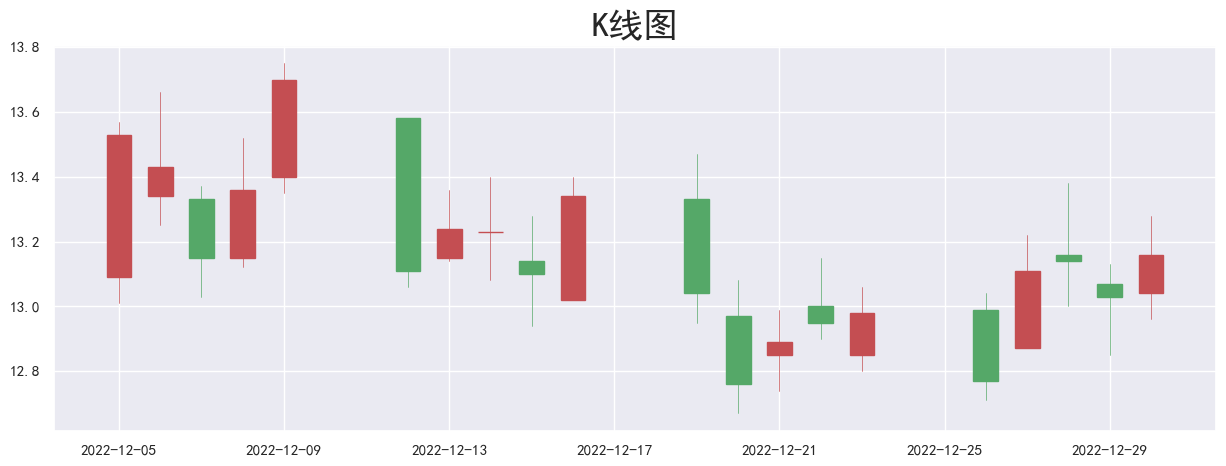

In [38]:
cut_data = quote[:20, :]
plt.rcParams['font.sans-serif'] = ['SimHei']
fig, axes = plt.subplots(figsize=(15, 5))
candlestick_ochl(axes, cut_data, width=0.6, colorup='r', colordown='g', alpha=1.0)
plt.title('K线图', fontsize=25)
plt.grid(True)
axes.xaxis_date()
plt.savefig('./1_jupyter.png')
plt.show()
plt.close()

## 均线图

In [39]:
read_data['MA5'] = read_data['close'].rolling(5).mean()
read_data['MA10'] = read_data['close'].rolling(10).mean()
MA = read_data.values[:, 11:]

MA

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [16.071999999999996, 17.156],
       [15.914000000000001, 16.815999999999995],
       [16.003999999999998, 16.582]], dtype=object)

In [40]:
quote = np.column_stack((quote, MA))

quote

array([[19356.0, 13.04, 13.16, ..., 12.96, nan, nan],
       [19355.0, 13.07, 13.03, ..., 12.85, nan, nan],
       [19354.0, 13.16, 13.14, ..., 13.0, nan, nan],
       ...,
       [15713.0, 16.3, 16.0, ..., 15.86, 16.071999999999996, 17.156],
       [15712.0, 15.98, 16.3, ..., 15.88, 15.914000000000001,
        16.815999999999995],
       [15709.0, 16.32, 15.99, ..., 15.92, 16.003999999999998, 16.582]],
      dtype=object)

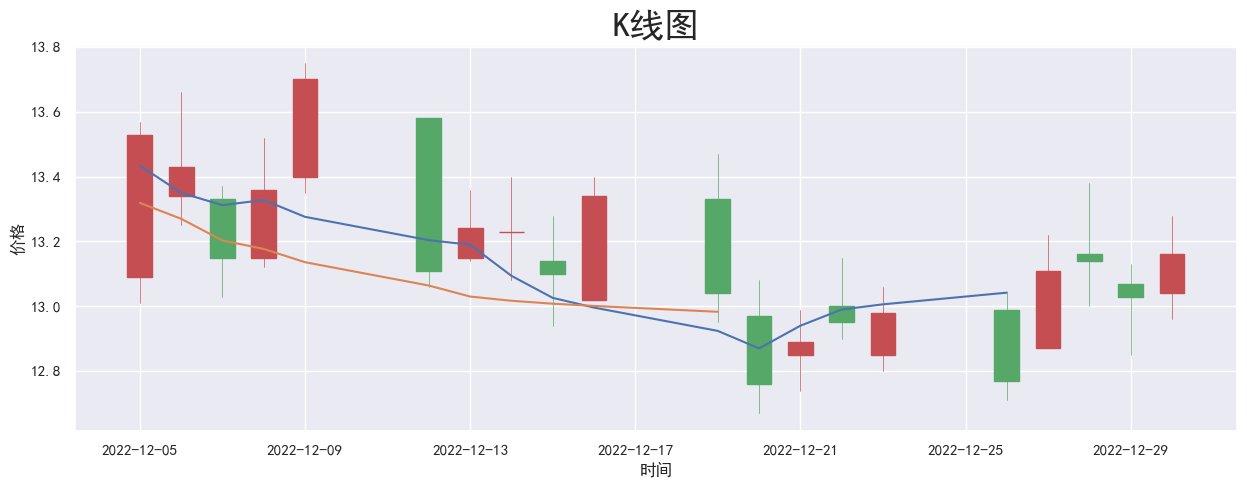

In [41]:
cut_data = quote[:20, :]
plt.rcParams['font.sans-serif'] = ['SimHei']
fig, axes = plt.subplots(figsize=(15, 5))
candlestick_ochl(axes, cut_data, width=0.6, colorup='r', colordown='g', alpha=1.0)
plt.plot(cut_data[:, 0], cut_data[:, 5])
plt.plot(cut_data[:, 0], cut_data[:, 6])
plt.title('K线图', fontsize=25)
plt.xlabel('时间')
plt.ylabel('价格')
plt.grid(True)
axes.xaxis_date()
plt.savefig('./2_jupyter.png')
plt.show()
plt.close()

## K线图, 均线图, 成交量

In [42]:
# 成交量数据
quote = np.column_stack((quote, read_data['vol']))

quote[:, 7]

array([818035.98, 666890.09, 791191.98, ..., 312479.12, 357169.25,
       443851.37], dtype=object)

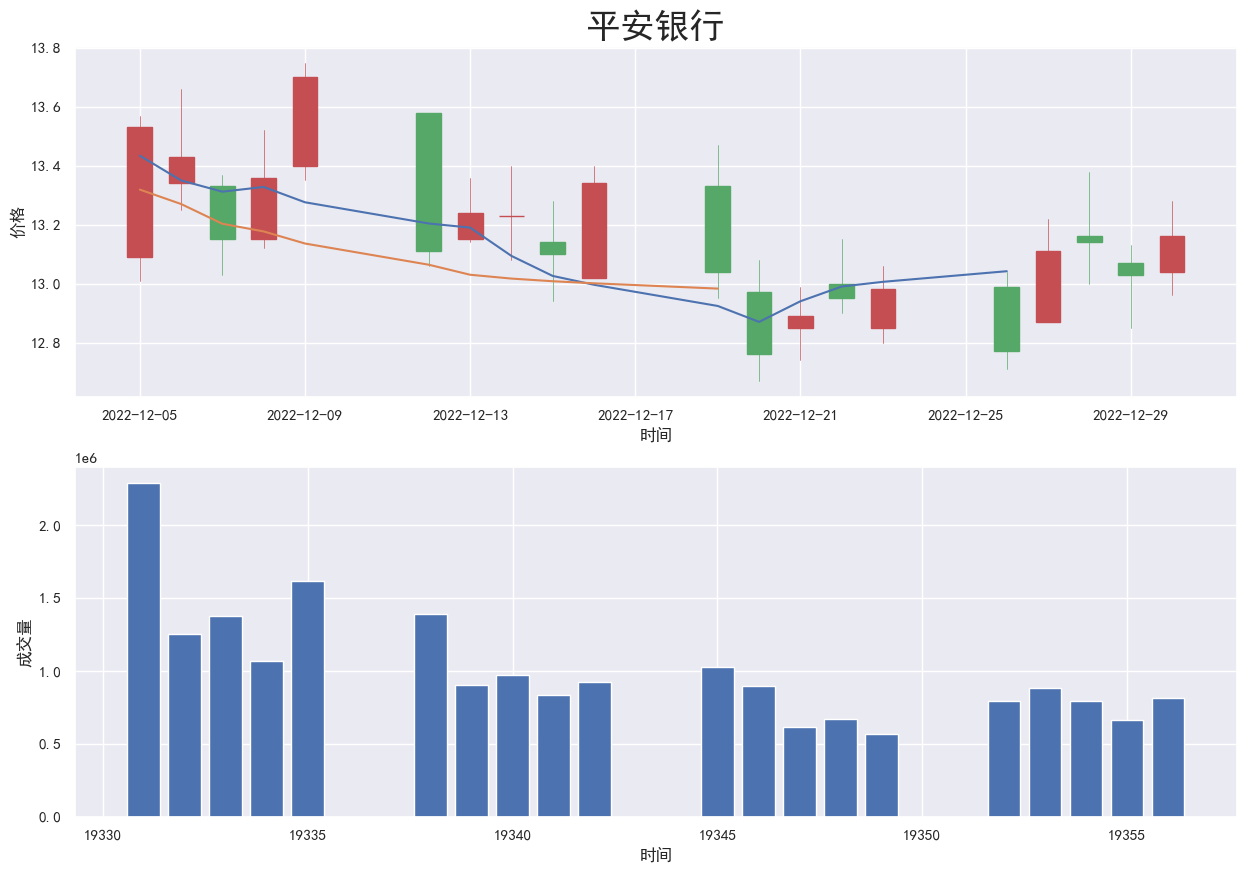

In [43]:
cut_data = quote[:20, :]
plt.rcParams['font.sans-serif'] = ['SimHei']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
axes1, axes2 = axes.flatten()

# K线图, 均线图
candlestick_ochl(axes1, cut_data, width=0.6, colorup='r', colordown='g', alpha=1.0)
axes1.plot(cut_data[:, 0], cut_data[:, 5])
axes1.plot(cut_data[:, 0], cut_data[:, 6])
axes1.set_title('平安银行', fontsize=25)
axes1.set_xlabel('时间')
axes1.set_ylabel('价格')
axes1.grid(True)
axes1.xaxis_date()

# 成交量
axes2.bar(cut_data[:, 0], cut_data[:, 7])
axes2.set_xlabel('时间')
axes2.set_ylabel('成交量')

# 制图
plt.savefig('./3_jupyter.png')
plt.show()
plt.close()